### 機械学習　演習

#### ボストン住宅家賃予測
#### 単純な線形回帰モデル(scikit learn)


In [115]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import requests
from pprint import pprint
import lightgbm

In [116]:
print(np.__version__)

1.19.5


In [117]:
boston = load_boston()

In [118]:
# print(boston)

In [119]:
# ディクショナリ型なので、keys()でデータ構成を確認できる。
print(boston.keys())
print(boston["feature_names"])

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [120]:
# print(boston["DESCR"])

In [121]:
print(boston["feature_names"])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [122]:
boston_data = boston["data"]

In [123]:
columns = boston["feature_names"]
# columns = np.append(columns, "MEDV") MEDV列はtargetの方にある。
df = pd.DataFrame(boston_data, columns=columns)
print(columns)
df

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [124]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [125]:
df.shape

(506, 13)

In [126]:
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [127]:
len(df['RM'].values)

506

In [128]:
explain = df[['RM']].values
# explain

In [129]:
target = df[['PRICE']].values
# target

In [130]:
model = LinearRegression()
model.fit(explain, target)
model.predict([[7]])

array([[29.04414209]])

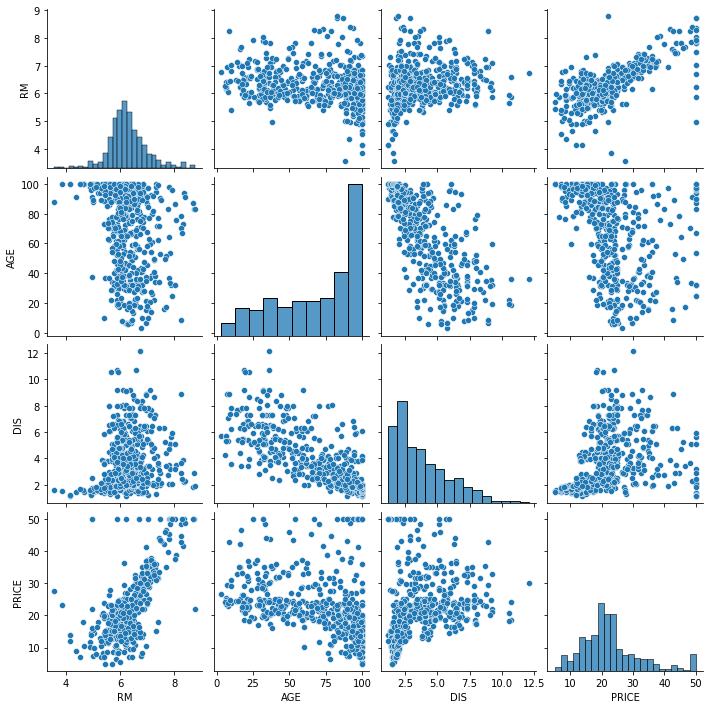

In [131]:
# 散布図行列でざっくり相関を確認
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df[["RM", "AGE", "DIS", "PRICE"]]) # seaborn.pariplotで散布図行列の描画

In [132]:
# 説明変数を追加
explain = df[['RM','DIS']].values
model = LinearRegression()
model.fit(explain, target)
model.predict([[7, 6]])

array([[29.90692384]])

In [133]:
# さらに追加
explain = df[['RM','DIS', 'ZN']].values
model = LinearRegression()
model.fit(explain, target)
model.predict([[7, 6, 40]])

array([[30.4200297]])

(array([372.,  12.,  48.,  16.,  13.,   6.,   4.,   6.,  19.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

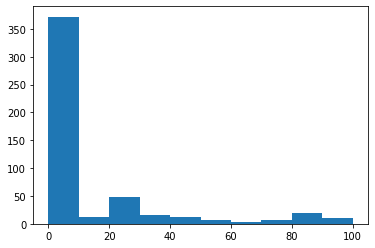

In [134]:
plt.hist(df['ZN'])

In [135]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [136]:
# 説明変数と目的変数を改めて準備
explain = df[['RM','DIS', 'ZN']].values
target = df[['PRICE']].values

In [137]:
# 単純に学習と予測
model = LinearRegression()
model.fit(explain, target)
print("score: ", model.score(explain, target)) # 学習データでのスコアでも0.5しかいかない。
model.predict([[7, 6, 40]])


score:  0.50658594274368


array([[30.4200297]])

In [138]:
# 分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(explain, target, random_state=0, train_size=0.7)
print(len(X_train))
print(len(X_test))

model = LinearRegression()
model.fit(X_train, y_train)
print("score: ", model.score(X_test, y_test)) # 検証データだとさらに低い。0.44
model.predict([[7, 6, 40]])

354
152
score:  0.4444787511285049


array([[30.66816442]])

In [139]:
# このセルの、「cross_val_score」 は、スコアの種類が一度にひとつしか計算できないので使わないほうがよい。
from sklearn.model_selection import cross_val_score
explain = df[['RM','DIS', 'ZN']].values
target = df[['PRICE']].values
model = LinearRegression()
scores = cross_val_score(model, explain, target)
# 各分割におけるスコア
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
import numpy as np
print('Average score: {}'.format(np.mean(scores)))

Cross-Validation scores: [ 0.69636231  0.61903785  0.50149366 -0.19361097 -1.74396334]
Average score: -0.024136097681940603


In [140]:
# 交差検証
# よくネットで見かける cross_val_scoreは、
# スコアの種類を同時にいくつも計算してくれなくて使い勝手が悪いとのこと。
# https://www.haya-programming.com/entry/2018/03/31/184557
# https://blog.amedama.jp/entry/sklearn-cv-custom-metric
# cross_validate を使用する
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
# from sklearn.model_selection import cross_val_score

# このように複数の種類を指定できる、が、今回は回帰なので
# これらの指標は関係なかった
# scoring = {"p": "precision_macro", "r": "recall_macro", "f": "f1_macro"}
# scoring = ['accuracy','precision','recall','f1']
# ここに適切な指標を指定しないとcontinuous is not supported と分かりづらいエラーが出る。
scoring = [
  'neg_mean_squared_error',
  'neg_median_absolute_error']
# くわしい説明はここ
# https://qiita.com/Mukomiz/items/f5c562ff8b538c1502d7

explain = df[['RM','DIS', 'ZN']].values
target = df[['PRICE']].values

# ネット上のStratified KfoldやGaussianNBを使用しているものを参考にしたため
# 動作するまで手こずった。
# StratifiedKfolde:  分類問題でないと使用できない
# GaussianNB:  ValueErrorが出て動かなかった
# ndarrayがまずいのかと思いtolist()に変えたりしたが、これは結局どちらでも動作する。

model = LinearRegression()
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits = 5)
# print(target.shape)
# print(type(explain))
import sklearn
scores = cross_validate(model, explain, target, cv=kf, scoring=scoring)

# これは評価方法の種類を列挙する
# pprint(sorted(sklearn.metrics.SCORERS.keys()))

pprint(scores)
print("MSE: ", scores["test_neg_mean_squared_error"].mean())
print("MAE: ", scores["test_neg_median_absolute_error"].mean())

{'fit_time': array([0.00064301, 0.00052547, 0.00051951, 0.00049567, 0.00047207]),
 'score_time': array([0.00067782, 0.00059533, 0.00054741, 0.00055766, 0.00056434]),
 'test_neg_mean_squared_error': array([ -10.48618691,  -34.68155751,  -39.92397823, -104.6938281 ,
        -72.95736673]),
 'test_neg_median_absolute_error': array([-2.18699661, -2.62695139, -4.24303442, -2.67800476, -6.78113431])}
MSE:  -52.5485834971779
MAE:  -3.7032242990755533


### ここからは、ボストン住宅データを線形回帰以外のアルゴリズムで実験的に学習する。

In [141]:
# ElasticNet

# サンプルをもとに改変
# https://blog.amedama.jp/entry/sklearn-cv-custom-metric

import math
from sklearn import datasets
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer


def rmse_score(y_true, y_pred):
    """RMSE (Root Mean Square Error: 平均二乗誤差平方根) を計算する関数"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse


def main():
    # Boston データセットを使った回帰問題
    # dataset = datasets.load_boston()
    # X, y = dataset.data, dataset.target

    # ElasticNet 回帰
    reg = ElasticNet(random_state=10)

    kf = KFold(n_splits=5, shuffle=True, random_state=10)

    score_funcs = {
        'rmse': make_scorer(rmse_score),
        'mae': 'neg_median_absolute_error'
    }

    # 出力はこのように平均して出す。
    scores = cross_validate(reg, explain, target, cv=kf, scoring=score_funcs)
    mean_rmse = scores['test_rmse'].mean()
    print('RMSE:', mean_rmse)
    mean_mae = scores['test_mae'].mean()
    print('MAE:', mean_mae)

main()

RMSE: 7.335149087760584
MAE: -3.5821757778028953


In [152]:
# LightGBM
param = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'max_depth': -1,
        'learning_rate': 0.01,        
    }
fit_params = {
    'early_stopping_rounds': 10
}

# これがClassifierになっているとよく分からないエラーが出て気づきづらいので注意。
model = lightgbm.LGBMRegressor(**param)
lgbm_explain = lightgbm.Dataset(explain.tolist())
lgbm_target = lightgbm.Dataset(target.tolist())

In [143]:
# 誤差関数を定義して使用
# RMSE 23、MER 0.9 という結果
# さっきの線形回帰よりはよい

# データの分割
#X = df.drop(['MEDV'],axis=1)
#y = df['MEDV']
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

# trainデータ, testデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cross Validationによる予測精度の評価
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# 誤差関数の定義
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def median_absolute_error_rate(y_true, y_pred):
    return np.median(np.absolute(y_true - y_pred) / y_true)

# Cross Validationで使う誤差関数のセット
scoring = {"r2": "r2",
           "RMSE":make_scorer(root_mean_squared_error),
           "MER":make_scorer(median_absolute_error_rate)}

model = lightgbm.LGBMRegressor(**param)

# cross_validate
scores = cross_validate(model, X_train, y_train, cv = 10, scoring = scoring, return_train_score=False)
for key,value in scores.items():
    print("{}:{:.3g}+/-{:.3g}".format(key, value.mean(), value.std()))

# 結果を格納
cv_accuracy_EN = pd.DataFrame(scores)[['test_r2','test_RMSE','test_MER']].mean()

# MERの結果が良すぎる

fit_time:0.00704+/-0.00138
score_time:0.00424+/-0.000608
test_r2:-5.97+/-1.47
test_RMSE:23.5+/-1.35
test_MER:0.953+/-0.00223


In [153]:
# 線形回帰のときにやった指定方法で実施してみる。

# データの分割
X = df.drop(['PRICE'], axis=1)
y = df['PRICE']

# trainデータ, testデータへの分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Cross Validationによる予測精度の評価
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

scoring = [
  "r2",
  'neg_mean_squared_error',
  'neg_median_absolute_error']

model = lightgbm.LGBMRegressor(**param)

# cross_validate
scores = cross_validate(model, X_train, y_train, cv = 10, scoring = scoring, return_train_score=False)
for key,value in scores.items():
    print("{}:{:.3g}+/-{:.3g}".format(key, value.mean(), value.std()))

# 結果を格納
cv_accuracy_EN = pd.DataFrame(scores)[['test_r2','test_neg_mean_squared_error','test_neg_median_absolute_error']].mean()

print(cv_accuracy_EN['test_neg_mean_squared_error'])
np.sqrt(-1 * cv_accuracy_EN['test_neg_mean_squared_error'])

np.sqrt(-1 * cv_accuracy_EN['test_neg_median_absolute_error'])


fit_time:0.00732+/-0.00263
score_time:0.00361+/-0.000282
test_r2:-5.97+/-1.47
test_neg_mean_squared_error:-553+/-63.9
test_neg_median_absolute_error:-20.2+/-0.944
-552.6385835365853


4.491102314577124

In [145]:
cross_validate(model, X_train, y_train, cv = 10, scoring = scoring, return_train_score=False)

{'fit_time': array([0.01201844, 0.00633311, 0.00649858, 0.006392  , 0.00633764,
        0.00631905, 0.0062623 , 0.00633526, 0.00647545, 0.00689149]),
 'score_time': array([0.00373602, 0.00347638, 0.0035274 , 0.0034709 , 0.00344324,
        0.00333667, 0.00337362, 0.00362539, 0.00349236, 0.00331211]),
 'test_neg_mean_squared_error': array([-504.97463415, -446.83780488, -593.78804878, -494.68609756,
        -554.57425   , -573.93125   , -588.68375   , -693.401     ,
        -550.9525    , -524.5565    ]),
 'test_neg_median_absolute_error': array([-19.6 , -19.5 , -21.  , -20.5 , -19.9 , -20.4 , -21.  , -20.45,
        -17.95, -21.4 ]),
 'test_r2': array([-4.77640032, -7.31563689, -5.86937511, -8.12736233, -5.90501176,
        -5.16361623, -6.52189481, -4.49242545, -3.49135777, -8.07843869])}

In [146]:
# 参考
# https://qiita.com/kibinag0/items/1a29db61fcb8c527d952


# scikit-learn を用いた交差検証（Cross-validation）と
# ハイパーパラメータのチューニング（grid search）
# https://qiita.com/tomov3/items/039d4271ed30490edf7b



### 単純な線形回帰モデルを自分で書く

$$
a = \frac{cov(x, y)}{s_x} \\
　\\
b = \bar{y} - a・\bar{x} \\
　\\
$$
y = ax + b  となる線形回帰
　



.



In [147]:
# 単純な線形回帰の実装

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linear(n_size):
  # 真のデータを生成する関数
  def base_func(x):
      return 1.5 * x + 6

  # 学習データ生成
  def fractuate(y_base):
      return y_base + np.random.normal(scale=0.3, size=y_base.shape)

  x_train = np.linspace(0, 1, n_size)
  y_base = base_func(x_train)
  y_train = fractuate(y_base)

  #学習
  def train(x, y):
      cov = np.cov(x, y, ddof=0)
      a = cov[0, 1] / cov[0, 0]
      b = np.mean(y) - a * np.mean(x)
      return cov, a, b

  cov, a, b = train(x_train, y_train)

  #予測
  #xs_new = np.linspace(0, 1, n_sample)
  ys_pred = a * x_train + b

  #結果の描画
  plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
  plt.plot(x_train, y_base, label="$1.5 x + 6$")
  plt.plot(x_train, ys_pred, label=f"prediction (a={a:.4}, b={b:.4}), dat_size{n_size}")
  plt.legend()
  plt.show()

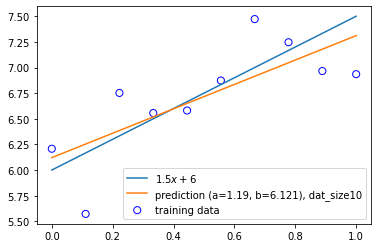

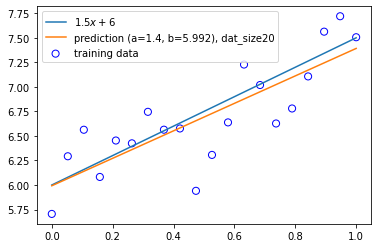

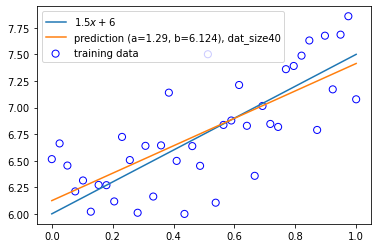

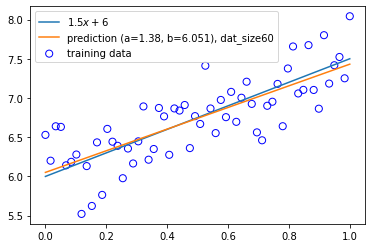

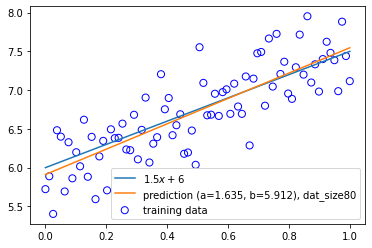

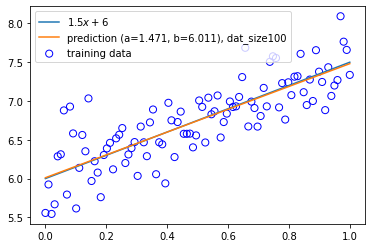

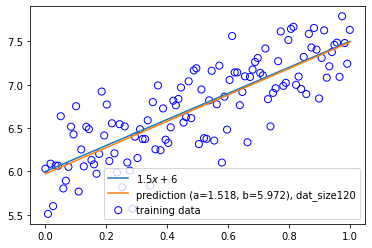

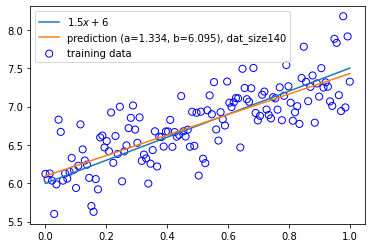

In [148]:
# データが増えるにつれて結果は安定する。（真の値に近い線になりやすい）
n_size = 10
linear(n_size)
n_size = 20
linear(n_size)
n_size = 40
linear(n_size)
n_size = 60
linear(n_size)
n_size = 80
linear(n_size)
n_size = 100
linear(n_size)
n_size = 120
linear(n_size)
n_size = 140

linear(n_size)

### 線形回帰（行列バージョン）を自分で書く

$$
W = (X^TX)^{-1}X^Ty  \\
\hat{y} = X_*W
$$

In [149]:
# 線形回帰（行列バージョン）
import numpy as np
# 説明変数
x = np.array([[1, 1.1, 1.0],
              [1, 2.5, 2.3],
              [1, 3.5, 3.1],
              [1, 3.6, 3.9],
              [1, 4.5, 4.9],
              [1, 4.5, 4.0],
              [1, 5.0, 5.6],
              [1, 5.5, 7.0],
              [1, 5.6, 6.6],
              [1, 6.0, 7.0],
              [1, 7.0, 7.9], 
              [1, 7.8, 6.8],
              [1, 8.2, 8.5],
              [1, 8.5, 8.9],
              [1, 9.0, 9.9],
              [1, 9.5, 9.5]])
# 教師データ
y = np.array([[3.1], [4.5], [4.9], [5.5], [6.3], [6.6], [7.5], [7.6], [7.9], [8.0], [9.0], [9.9], [10.1], [10.5], [11.2], [12.1]])
# print(y)
# 新規説明変数
xstar = np.array(([1, 5, 6]))   # 想定7くらい？

# 予測計算(最小二乗法)
xx = x.T @ x
xxinv = np.linalg.inv(xx)
w = xxinv @ x.T @ y
yhat = xstar @ w
print(yhat)
# だいたい想定どおり(7.06551346)

[7.06551346]


# ロジスティック回帰

教材のnp_logistic_regression.ipynbを参考に。

In [246]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [247]:
n_sample = 300
harf_n_sample = int(n_sample / 2) # n_sampleの半分だが、int型にしないと落ちる。
var = .2

def gen_data(n_sample, harf_n_sample):
    x0 = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    x1 = np.random.normal(size=n_sample).reshape(-1, 2) + 1.
    # -1したものと+1したものを結合
    x_train = np.concatenate([x0, x1])
    # print(x_train)
    # 前半は0、後半は1の教師ラベルを作成
    y_train = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)
    return x_train, y_train

def plt_data(x_train, y_train):
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()

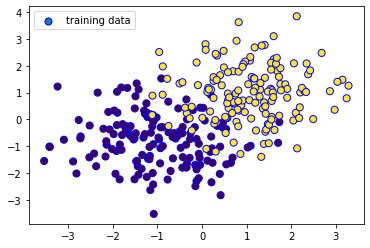

In [249]:
#データ作成
x_train, y_train = gen_data(n_sample, harf_n_sample)
#データ表示
plt_data(x_train, y_train)

識別モデルとして$p(y=1 | \boldsymbol{x}; \boldsymbol{w}) = \sigma (\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x})$を用いる。

ただし、$\sigma(\cdot)$はシグモイド関数であり、$\sigma(h) = \frac{1}{1 + \exp{(-h)}}$で定義される。

また、陽には書かないが、$\boldsymbol{x}$には定数項のための$1$という要素があることを仮定する。

訓練データ$X = [\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, ..., \boldsymbol{x}_{n}]^{\mathrm{T}}, \boldsymbol{y} = [y_{1}, y_{2}, ..., y_{n}]^{\mathrm{T}} (y_{i} = \{0, 1\})$に対して尤度関数$L$は以下のように書ける。

$L(\boldsymbol{w}) = \prod_{i=1}^{n} p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w})^{y_{i}} (1 - p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w}))^{1 - y_{i}}$

負の対数尤度関数は

$- \log{L(\boldsymbol{w})} = - \sum_{i=1}^{n} \left[ y_{i} \log{p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w})} + (1 - y_{i}) \log{(1 - p(y_{i}=1 | \boldsymbol{x}_{i}; \boldsymbol{w}))} \right]$

のように書ける。 これを最小化する$\boldsymbol{w}$を求める。

$\frac{d \sigma(h)}{d h} = \sigma(h)(1 - \sigma(h))$と書けることを考慮し、負の対数尤度関数を$\boldsymbol{w}$で偏微分すると、

\begin{eqnarray}
\frac{\partial }{\partial \boldsymbol{w}} (-\log{L(\boldsymbol{w})}) &=& -\sum_{i=1}^{n} \left[ y_{i} (1 - \sigma(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i})) - (1 - y_{i}) \sigma(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}) \right] \boldsymbol{x}_{i}  \\
&=& \sum_{i=1}^{n} \left( \sigma(\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x}_{i}) - y_{i} ) \right) \boldsymbol{x}_{i}
\end{eqnarray}

この式が$0$となる$\boldsymbol{w}$は解析的に求められないので、今回は$-\log{L(\boldsymbol{w})}$の最小化問題を最急降下法を用いて解く。

最急降下法では学習率を$\eta$とすると、以下の式で$\boldsymbol{w}$を更新する。

$\boldsymbol{w} \leftarrow \boldsymbol{w} - \eta \frac{\partial }{\partial \boldsymbol{w}} (-\log{L(\boldsymbol{w})})$

In [250]:
# w0は定数項なので、入力値のx0として1固定の列が必要なので追加する。
def add_one(x):
  result = np.concatenate([np.ones(len(x))[:, None], x], axis=1)
  return result

In [251]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sgd(X_train, y_train, max_iter, eta):
    w = np.zeros(X_train.shape[1])
    for _ in range(max_iter):
        w_prev = np.copy(w)
        sigma = sigmoid(np.dot(X_train, w))
        grad = np.dot(X_train.T, (sigma - y_train))
        w -= eta * grad
        if np.allclose(w, w_prev):
            # max_iter到達前でも、更新前後でwが変化しないようなら終了。
            return w
    return w

In [252]:
X_train = add_one(x_train)
max_iter=100
eta = 0.01
w = sgd(X_train, y_train, max_iter, eta)

In [253]:
print(w)

[-0.08766741  2.43918466  2.09326836]


## 予測
入力に対して、$y=1$である確率を出力する。よって

$p(y=1 | \boldsymbol{x}; \boldsymbol{w}) = \sigma (\boldsymbol{w}^{\mathrm{T}} \boldsymbol{x})$の値が

$0.5$より大きければ1に、小さければ0に分類する。

In [254]:
# -5～5まで100分割の格子点を作成している。
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

In [255]:
X_test = add_one(xx)
proba = sigmoid(np.dot(X_test, w))
y_pred = (proba > 0.5).astype(np.int)
print(y_pred)
print(len(y_pred)) # 100*100なので10000件

[0 0 0 ... 1 1 1]
10000


[-0.08766741  2.43918466  2.09326836]


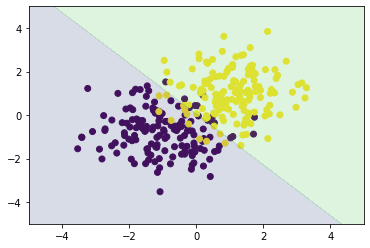

In [256]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
print(w)

In [265]:
x_test = [[1, 3, 1.5]]
predict_single = sigmoid(np.dot(x_test, w))
print(predict_single)

x_test = [[1, -1, -1.5]]
predict_single = sigmoid(np.dot(x_test, w))
print(predict_single)

x_test = [[1, -0.1, -0.2]]
predict_single = sigmoid(np.dot(x_test, w))
print(predict_single)

x_test = [[1, -0.1, 0.2]]
predict_single = sigmoid(np.dot(x_test, w))
print(predict_single)

[0.99996864]
[0.00344715]
[0.32076911]
[0.52175321]


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}
array([[2.15008286, 2.16395346]])


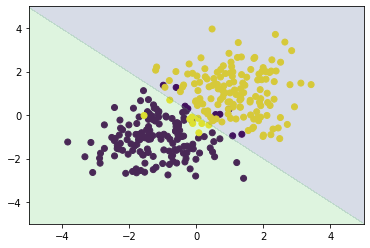

In [240]:

# scikit learn との比較
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)
model.fit(x_train, y_train)
proba = model.predict_proba(xx)
y_pred = (proba > 0.5).astype(np.int)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(xx0, xx1, proba[:, 0].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
import pprint
pprint.pprint(model.get_params())
pprint.pprint(model.coef_)